In [ ]:
! gdown 1f2ib7Q-O2fOGYXB_6Ck66DAlXnVuxWKw

Downloading...
From: https://drive.google.com/uc?id=1f2ib7Q-O2fOGYXB_6Ck66DAlXnVuxWKw
To: /content/application_train.csv
100% 166M/166M [00:02<00:00, 65.6MB/s]


In [ ]:
import numpy as np, pandas as pd

data = pd.read_csv('application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

data.head(3)


target value_counts:


0    282686
1     24825
Name: target, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(exclude=['object']).columns

print("Категориальные признаки ({0} шт.): {1}".format(len(categorical_features), categorical_features))
print("Числовые признаки ({0} шт.): {1}".format(len(numerical_features), numerical_features))

Категориальные признаки (16 шт.): Index(['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'weekday_appr_process_start', 'organization_type', 'fondkapremont_mode',
       'housetype_mode', 'wallsmaterial_mode', 'emergencystate_mode'],
      dtype='object')
Числовые признаки (106 шт.): Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       ...
       'flag_document_18', 'flag_document_19', 'flag_document_20',
       'flag_document_21', 'amt_req_credit_bureau_hour',
       'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
       'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
       'amt_req_credit_bureau_year'],
      dtype='object', length=106)


In [ ]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(50)

,Total,Percent
commonarea_medi,214865,69.872297
commonarea_avg,214865,69.872297
commonarea_mode,214865,69.872297
nonlivingapartments_mode,213514,69.432963
nonlivingapartments_avg,213514,69.432963
nonlivingapartments_medi,213514,69.432963
fondkapremont_mode,210295,68.386172
livingapartments_mode,210199,68.354953
livingapartments_avg,210199,68.354953
livingapartments_medi,210199,68.354953


In [ ]:
msng_col = missing_application_train_data[missing_application_train_data['Percent']>=40].index.to_list()
data_msng_rmvd = data.drop(labels=msng_col,axis=1)
data_msng_rmvd.shape

(307511, 73)

In [ ]:
flag_col = []

for col in data_msng_rmvd.columns:
    if col.startswith("flag_"):
        flag_col.append(col)

In [ ]:
len(flag_col)

28

In [ ]:
flag_tgt_col = data_msng_rmvd[flag_col+['target']]
flag_tgt_col.head()

,flag_own_car,flag_own_realty,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,target
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
flag_tgt_col['flag_own_car'] = flag_tgt_col['flag_own_car'].replace({'N': 0, 'Y': 1})
flag_tgt_col['flag_own_realty'] = flag_tgt_col['flag_own_realty'].replace({'N': 0, 'Y': 1})

<ipython-input-9-77481d6ccb0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_tgt_col['flag_own_car'] = flag_tgt_col['flag_own_car'].replace({'N': 0, 'Y': 1})
<ipython-input-9-77481d6ccb0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_tgt_col['flag_own_realty'] = flag_tgt_col['flag_own_realty'].replace({'N': 0, 'Y': 1})


In [ ]:
flag_tgt_col.head()

,flag_own_car,flag_own_realty,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,target
0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

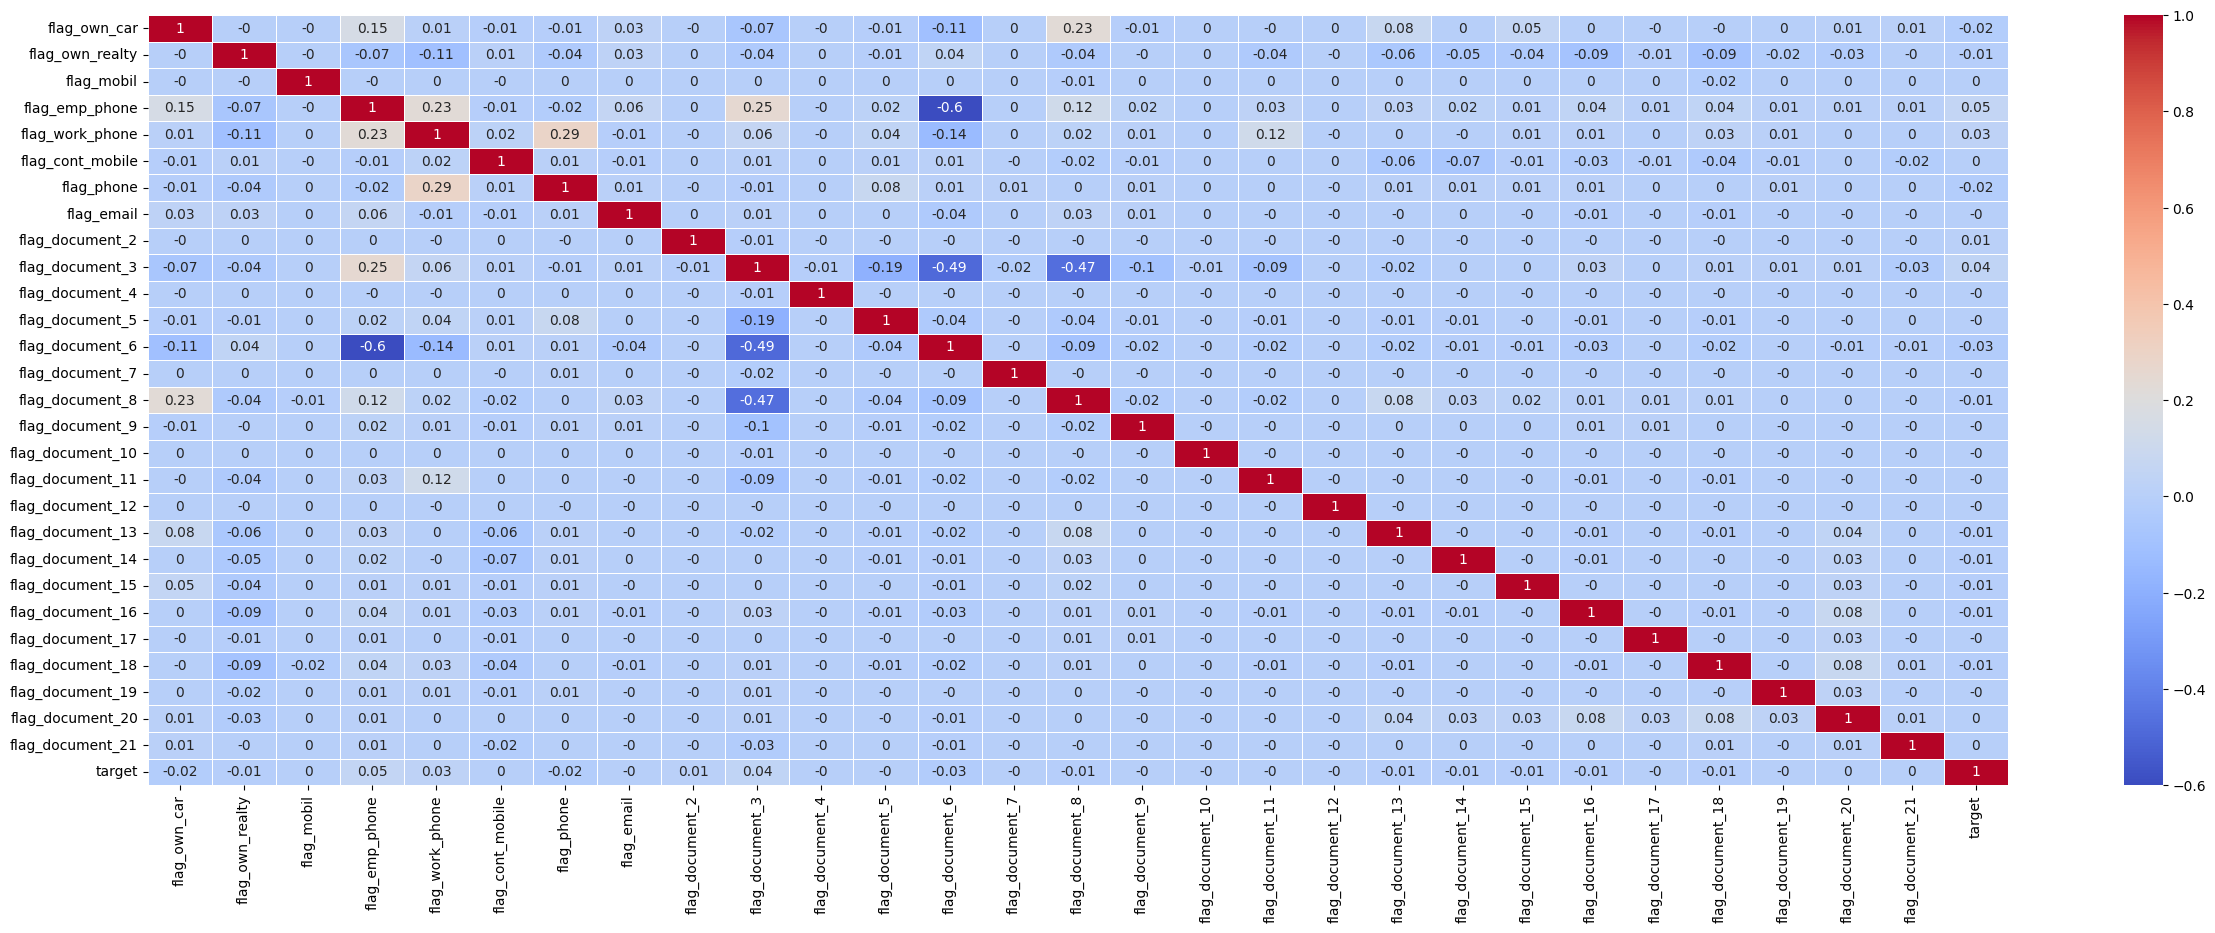

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = round(flag_tgt_col.corr(),2)

plt.figure(figsize=(30,10))
sns.heatmap(corr_df,cmap='coolwarm',linewidths=.5,annot=True)

In [ ]:
data_flag_rmvd = data_msng_rmvd.drop(labels =flag_col,axis=1)
data_flag_rmvd.shape

(307511, 45)

<Axes: >

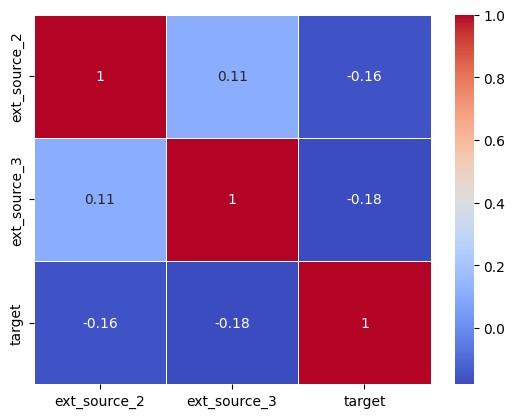

In [ ]:
sns.heatmap(data=round(data_flag_rmvd[['ext_source_2','ext_source_3','target']].corr(),2),cmap='coolwarm',linewidths=.5,annot=True)

In [ ]:
data_flag_ext_rmvd = data_flag_rmvd.drop(['ext_source_2','ext_source_3', 'sk_id_curr'],axis=1)
data_flag_ext_rmvd.shape

(307511, 42)

In [ ]:
data_flag_ext_rmvd.isnull().sum().sort_values(ascending=False) / data_flag_ext_rmvd.shape[0]

occupation_type                0.313455
amt_req_credit_bureau_year     0.135016
amt_req_credit_bureau_qrt      0.135016
amt_req_credit_bureau_mon      0.135016
amt_req_credit_bureau_week     0.135016
amt_req_credit_bureau_day      0.135016
amt_req_credit_bureau_hour     0.135016
name_type_suite                0.004201
obs_60_cnt_social_circle       0.003320
obs_30_cnt_social_circle       0.003320
def_30_cnt_social_circle       0.003320
def_60_cnt_social_circle       0.003320
amt_goods_price                0.000904
amt_annuity                    0.000039
cnt_fam_members                0.000007
days_last_phone_change         0.000003
reg_region_not_live_region     0.000000
organization_type              0.000000
live_city_not_work_city        0.000000
reg_city_not_work_city         0.000000
reg_city_not_live_city         0.000000
live_region_not_work_region    0.000000
reg_region_not_work_region     0.000000
target                         0.000000
hour_appr_process_start        0.000000


In [ ]:
data_flag_ext_rmvd['cnt_fam_members'] = data_flag_ext_rmvd['cnt_fam_members'].fillna((data_flag_ext_rmvd['cnt_fam_members'].mode()[0]))

In [ ]:
data_flag_ext_rmvd['occupation_type'] = data_flag_ext_rmvd['occupation_type'].fillna((data_flag_ext_rmvd['occupation_type'].mode()[0]))

In [ ]:
data_flag_ext_rmvd['name_type_suite'] = data_flag_ext_rmvd['name_type_suite'].fillna((data_flag_ext_rmvd['name_type_suite'].mode()[0]))

In [ ]:
data_flag_ext_rmvd['amt_annuity'] = data_flag_ext_rmvd['amt_annuity'].fillna((data_flag_ext_rmvd['amt_annuity'].mean()))

In [ ]:
data_flag_ext_rmvd['amt_goods_price'] = data_flag_ext_rmvd['amt_goods_price'].fillna((data_flag_ext_rmvd['amt_goods_price'].median()))

In [ ]:
amt_req_col = []

for col in data_flag_ext_rmvd.columns:
    if col.startswith("amt_req_credit"):
        amt_req_col.append(col)

amt_req_col

['amt_req_credit_bureau_hour',
 'amt_req_credit_bureau_day',
 'amt_req_credit_bureau_week',
 'amt_req_credit_bureau_mon',
 'amt_req_credit_bureau_qrt',
 'amt_req_credit_bureau_year']

In [ ]:
for col in amt_req_col:
    data_flag_ext_rmvd[col] = data_flag_ext_rmvd[col].fillna((data_flag_ext_rmvd[col].median()))

In [ ]:
days_col = []

for col in data_flag_ext_rmvd.columns:
    if col.startswith("days"):
        days_col.append(col)

data_flag_ext_rmvd[days_col].head()

,days_birth,days_employed,days_registration,days_id_publish,days_last_phone_change
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


In [ ]:
for col in days_col:
    data_flag_ext_rmvd[col] = abs(data_flag_ext_rmvd[col])

In [ ]:
spec_col = ['def_30_cnt_social_circle', 'def_60_cnt_social_circle', 'obs_60_cnt_social_circle', 'obs_30_cnt_social_circle']

data_flag_ext_rmvd[spec_col].describe()

,def_30_cnt_social_circle,def_60_cnt_social_circle,obs_60_cnt_social_circle,obs_30_cnt_social_circle
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.143421,0.100049,1.405292,1.422245
std,0.446698,0.362291,2.379803,2.400989
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,2.000000
max,34.000000,24.000000,344.000000,348.000000


In [ ]:
for col in spec_col:
    data_flag_ext_rmvd[col] = data_flag_ext_rmvd[col].fillna(0)

In [ ]:
data_flag_ext_rmvd = data_flag_ext_rmvd.dropna(subset=['days_last_phone_change'])

In [ ]:
data_flag_ext_rmvd.isnull().sum().sort_values(ascending=False) / data_flag_ext_rmvd.shape[0]

target                         0.0
obs_30_cnt_social_circle       0.0
hour_appr_process_start        0.0
reg_region_not_live_region     0.0
reg_region_not_work_region     0.0
live_region_not_work_region    0.0
reg_city_not_live_city         0.0
reg_city_not_work_city         0.0
live_city_not_work_city        0.0
organization_type              0.0
def_30_cnt_social_circle       0.0
name_contract_type             0.0
obs_60_cnt_social_circle       0.0
def_60_cnt_social_circle       0.0
days_last_phone_change         0.0
amt_req_credit_bureau_hour     0.0
amt_req_credit_bureau_day      0.0
amt_req_credit_bureau_week     0.0
amt_req_credit_bureau_mon      0.0
amt_req_credit_bureau_qrt      0.0
weekday_appr_process_start     0.0
region_rating_client_w_city    0.0
region_rating_client           0.0
cnt_fam_members                0.0
code_gender                    0.0
cnt_children                   0.0
amt_income_total               0.0
amt_credit                     0.0
amt_annuity         

In [ ]:
categorical_features_after_rmv = data_flag_ext_rmvd.select_dtypes(include=['object']).columns

In [ ]:
df_encoded = pd.get_dummies(data_flag_ext_rmvd, columns = categorical_features_after_rmv)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

model = LogisticRegression(max_iter=1000)

y_pred = cross_val_predict(model, X, y, cv=5)

report = classification_report(y, y_pred, output_dict=True)

for class_name in report:
    if class_name != 'accuracy':
        report[class_name].pop('support', None)

report_df = pd.DataFrame(report).transpose()
print("Accuracy:", report['accuracy'])
print(report_df)

Accuracy: 0.9192579103118598
              precision    recall  f1-score
0              0.919270  0.999986  0.957931
1              0.000000  0.000000  0.000000
accuracy       0.919258  0.919258  0.919258
macro avg      0.459635  0.499993  0.478965
weighted avg   0.845058  0.919258  0.880598


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

model = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (cross-validated):", round(best_score, 3))

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score (cross-validated): 0.919


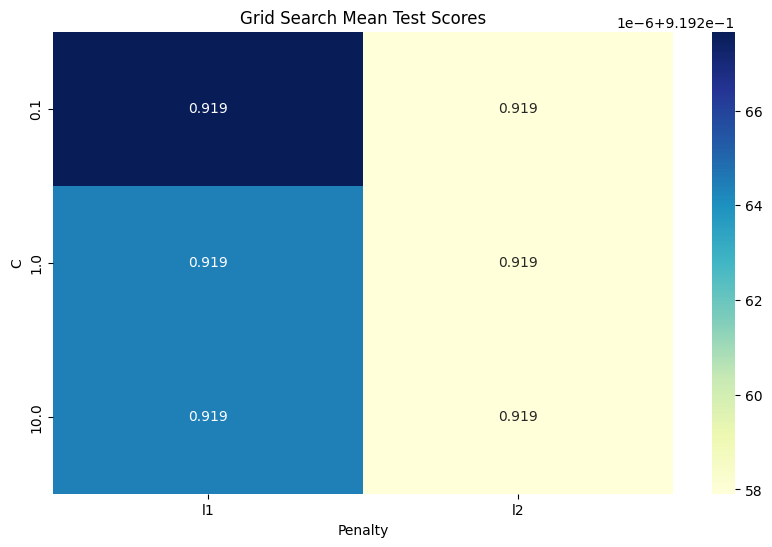

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_C', 'param_penalty', 'mean_test_score']]
results = results.pivot_table(index='param_C', columns='param_penalty', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(results, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Grid Search Mean Test Scores')
plt.xlabel('Penalty')
plt.ylabel('C')
plt.show()

После получения странных результатов решил попробовать сбалансировать класс

Text(0.5, 1.0, 'Соотношение payment_difficulties и no_difficulties')

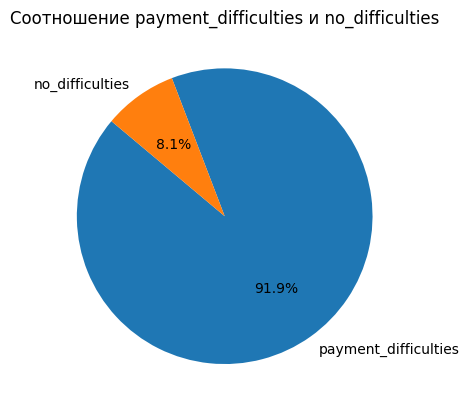

In [ ]:
labels = ['payment_difficulties', 'no_difficulties']

value_counts = y.value_counts()
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title("Соотношение payment_difficulties и no_difficulties")

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

ros = RandomOverSampler(sampling_strategy="not majority")

X_resampled, y_resampled = ros.fit_resample(X, y)

model = LogisticRegression(max_iter=1000)

y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5, method='predict_proba')

report = classification_report(y_resampled, y_pred.argmax(axis=1), output_dict=True)

for class_name in report:
    if class_name != 'accuracy':
        report[class_name].pop('support', None)

report_df_balance = pd.DataFrame(report).transpose()

print("Accuracy with oversampling:", report['accuracy'])
print(report_df_balance)

Accuracy with oversampling: 0.5784141358756213
              precision    recall  f1-score
0              0.573481  0.611985  0.592107
1              0.584058  0.544843  0.563769
accuracy       0.578414  0.578414  0.578414
macro avg      0.578769  0.578414  0.577938
weighted avg   0.578769  0.578414  0.577938


In [ ]:
obj_dtypes = [i for i in data_flag_ext_rmvd.select_dtypes(include=object).columns if i not in ["type"]]
num_dtypes = [i for i in data_flag_ext_rmvd.select_dtypes(include=np.number).columns if i not in ["target"]]

In [ ]:
obj_dtypes

['name_contract_type',
 'code_gender',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type']

In [ ]:
num_dtypes

['cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'obs_30_cnt_social_circle',
 'def_30_cnt_social_circle',
 'obs_60_cnt_social_circle',
 'def_60_cnt_social_circle',
 'days_last_phone_change',
 'amt_req_credit_bureau_hour',
 'amt_req_credit_bureau_day',
 'amt_req_credit_bureau_week',
 'amt_req_credit_bureau_mon',
 'amt_req_credit_bureau_qrt',
 'amt_req_credit_bureau_year']

Дабы сэкономить ресурсы решил ограничить размер данных

In [ ]:
df_encoded_sample = df_encoded.sample(n=9000)

In [ ]:
Target = round((sum(df_encoded_sample['target'])/len(df_encoded_sample['target'].index))*100,2)
print("Converted rate after data manipulation {} %".format(Target))

Converted rate after data manipulation 8.09 %


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

X_sample = df_encoded_sample.drop(['target'], axis=1)
y_sample = df_encoded_sample['target']

scaler = StandardScaler()
X_sample = scaler.fit_transform(X_sample)

model = DecisionTreeClassifier()

ros = RandomOverSampler(sampling_strategy="not majority")

X_resampled, y_resampled = ros.fit_resample(X_sample, y_sample)

y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)

report = classification_report(y_resampled, y_pred, output_dict=True)
for class_name in report:
    if class_name != 'accuracy':
        report[class_name].pop('support', None)

accuracy = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Accuracy Decision Tree with oversampling:", accuracy.mean())

report_df_dt = pd.DataFrame(report).transpose()
print(report_df_dt)

Accuracy Decision Tree with oversampling: 0.9477181276802991
              precision    recall  f1-score
0              0.999595  0.893866  0.943779
1              0.904018  0.999638  0.949427
accuracy       0.946752  0.946752  0.946752
macro avg      0.951807  0.946752  0.946603
weighted avg   0.951807  0.946752  0.946603


SVM (с балансировкой)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler

pca = PCA(n_components=2)

X_sample_train_pca = pca.fit_transform(X_sample)
X_sample_test_pca = pca.transform(X_sample)

svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly', degree=3)

ros = RandomOverSampler(sampling_strategy="not majority")

X_resampled, y_resampled = ros.fit_resample(X_sample, y_sample)

def get_classification_report(model, X, y):
    y_pred = cross_val_predict(model, X, y, cv=5)
    report = classification_report(y, y_pred, output_dict=True)
    for class_name in report:
        if class_name != 'accuracy':
            report[class_name].pop('support', None)
    return report

report_linear = get_classification_report(svm_linear, X_resampled, y_resampled)
report_rbf = get_classification_report(svm_rbf, X_resampled, y_resampled)
report_poly = get_classification_report(svm_poly, X_resampled, y_resampled)

print("Classification Report (Linear Kernel):")
print(pd.DataFrame(report_linear).transpose())
print('-' * 60)
print("Classification Report (RBF Kernel):")
print(pd.DataFrame(report_rbf).transpose())
print('-' * 60)
print("Classification Report (Polynomial Kernel):")
print(pd.DataFrame(report_poly).transpose())

Classification Report (Linear Kernel):
              precision    recall  f1-score
0              0.683746  0.631579  0.656628
1              0.657695  0.707874  0.681863
accuracy       0.669727  0.669727  0.669727
macro avg      0.670720  0.669727  0.669245
weighted avg   0.670720  0.669727  0.669245
------------------------------------------------------------
Classification Report (RBF Kernel):
              precision    recall  f1-score
0              0.928494  0.815857  0.868539
1              0.835779  0.937169  0.883575
accuracy       0.876513  0.876513  0.876513
macro avg      0.882137  0.876513  0.876057
weighted avg   0.882137  0.876513  0.876057
------------------------------------------------------------
Classification Report (Polynomial Kernel):
              precision    recall  f1-score
0              0.871829  0.878825  0.875313
1              0.877845  0.870801  0.874309
accuracy       0.874813  0.874813  0.874813
macro avg      0.874837  0.874813  0.874811
weighted avg

Среди ядер хорошо отработали радиальное и полиномиальное, но результаты всё таки хуже чем DecisionTree

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

X_sample = df_encoded_sample.drop(['target'], axis=1)
y_sample = df_encoded_sample['target']

ros = RandomOverSampler(sampling_strategy="not majority")

X_resampled, y_resampled = ros.fit_resample(X_sample, y_sample)

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

model = RandomForestClassifier()

y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)

report = classification_report(y_resampled, y_pred, output_dict=True)

for class_name in report:
    if class_name != 'accuracy':
        report[class_name].pop('support', None)

report_df = pd.DataFrame(report).transpose()

print("Accuracy Random Forest with oversampling:", report['accuracy'])
print(report_df)

Accuracy Random Forest with oversampling: 0.9998787731846285
              precision    recall  f1-score
0              1.000000  0.999758  0.999879
1              0.999758  1.000000  0.999879
accuracy       0.999879  0.999879  0.999879
macro avg      0.999879  0.999879  0.999879
weighted avg   0.999879  0.999879  0.999879


Подозрительные результаты

А если немного углубимся то результат 50/50

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

X_sample = df_encoded_sample.drop(['target'], axis=1)
y_sample = df_encoded_sample['target']

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

ros_train = RandomOverSampler(sampling_strategy="not majority")
X_resampled_train, y_resampled_train = ros_train.fit_resample(X_train, y_train)

ros_test = RandomOverSampler(sampling_strategy="not majority")
X_resampled_test, y_resampled_test = ros_test.fit_resample(X_test, y_test)

scaler = StandardScaler()
X_resampled_train = scaler.fit_transform(X_resampled_train)
X_resampled_test = scaler.transform(X_resampled_test)

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

grid_search.fit(X_resampled_train, y_resampled_train)

best_params = grid_search.best_params_

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_resampled_train, y_resampled_train)

y_pred = best_model.predict(X_resampled_test)

report = classification_report(y_resampled_test, y_pred, output_dict=True, zero_division=1)

for class_name in report:
    if class_name != 'accuracy':
        report[class_name].pop('support', None)

report_df = pd.DataFrame(report).transpose()
print("Accuracy Random Forest with oversampling:", report['accuracy'])
print("Best Parameters:", best_params)
print(report_df)

Accuracy Random Forest with oversampling: 0.5
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision  recall  f1-score
0                  0.50     1.0  0.666667
1                  1.00     0.0  0.000000
accuracy           0.50     0.5  0.500000
macro avg          0.75     0.5  0.333333
weighted avg       0.75     0.5  0.333333


GBM

Сначала попробовал через Gridsearch

```
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
}
```
3 часа былы потрачены на ожидание кода)

Решил вручную сначала запустить на параметрах, которые маловероятно приведут к переобучению

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

X_sample = df_encoded_sample.drop(['target'], axis=1)
y_sample = df_encoded_sample['target']

learning_rate = 0.01
max_depth = 4
n_estimators = 100
subsample = 0.5

gbm = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, subsample=subsample)

ros = RandomOverSampler(sampling_strategy="not majority")
X_resampled, y_resampled = ros.fit_resample(X_sample, y_sample)

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

y_pred = gbm.fit(X_resampled, y_resampled).predict(X_resampled)

report = classification_report(y_resampled, y_pred, output_dict=True)
for class_name in report:
    if class_name != 'accuracy':
        report[class_name].pop('support', None)

report_df = pd.DataFrame(report).transpose()

print("Accuracy GBM:", report['accuracy'])
print(report_df)

Accuracy GBM: 0.6924746743849494
              precision    recall  f1-score
0              0.700452  0.672576  0.686231
1              0.685108  0.712373  0.698475
accuracy       0.692475  0.692475  0.692475
macro avg      0.692780  0.692475  0.692353
weighted avg   0.692780  0.692475  0.692353


Тут уже поигравшись с значениями пришёл к отличным значениям метрик, но есть вероятность переобучения

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

X_sample = df_encoded_sample.drop(['target'], axis=1)
y_sample = df_encoded_sample['target']

learning_rate = 0.2
max_depth = 6
n_estimators = 200
subsample = 0.9

gbm = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, subsample=subsample)

ros = RandomOverSampler(sampling_strategy="not majority")
X_resampled, y_resampled = ros.fit_resample(X_sample, y_sample)

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

y_pred = gbm.fit(X_resampled, y_resampled).predict(X_resampled)

report = classification_report(y_resampled, y_pred, output_dict=True)
for class_name in report:
    if class_name != 'accuracy':
        report[class_name].pop('support', None)

report_df = pd.DataFrame(report).transpose()

print("Accuracy GBM:", report['accuracy'])
print(report_df)

Accuracy GBM: 0.9995779064158224
              precision    recall  f1-score
0              1.000000  0.999156  0.999578
1              0.999157  1.000000  0.999578
accuracy       0.999578  0.999578  0.999578
macro avg      0.999578  0.999578  0.999578
weighted avg   0.999578  0.999578  0.999578


XGBoost

In [ ]:
import xgboost as xgb

X_sample = df_encoded_sample.drop(['target'], axis=1)
y_sample = df_encoded_sample['target']

model = xgb.XGBClassifier()

ros = RandomOverSampler(sampling_strategy="not majority")
X_resampled, y_resampled = ros.fit_resample(X_sample, y_sample)

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)

report = classification_report(y_resampled, y_pred, output_dict=True)

for class_name in report:
    if class_name != 'accuracy':
        report[class_name].pop('support', None)

accuracy = report['accuracy']
report.pop('accuracy', None)

report_df = pd.DataFrame(report).transpose()

print("Accuracy:", accuracy)
print(report_df)

Accuracy: 0.9664737095996141
              precision    recall  f1-score
0              0.998582  0.934274  0.965358
1              0.938251  0.998673  0.967520
macro avg      0.968416  0.966474  0.966439
weighted avg   0.968416  0.966474  0.966439


**Показалось, что деревья справляются датасетами данного рода (где имеется дисбаланс в таргете). Но через градиентный бустинг тоже можно получить неплохие результаты без вероятность переобучения.**

Попробуем как бонус блендинг

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

X_sample = df_encoded_sample.drop(['target'], axis=1)
y_sample = df_encoded_sample['target']

ros = RandomOverSampler(sampling_strategy="not majority")
X_resampled, y_resampled = ros.fit_resample(X_sample, y_sample)

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

svm_poly = SVC(kernel='poly', degree=3)
gbm = GradientBoostingClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100)

voting_model = VotingClassifier(estimators=[
    ('SVM_Poly', svm_poly),
    ('GBM', gbm),
    ('RandomForest', rf)
], voting='hard')

accuracy_scores = cross_val_score(voting_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

mean_accuracy = accuracy_scores.mean()
print("Mean Accuracy (Voting Hard):", mean_accuracy)

y_pred = cross_val_predict(voting_model, X_resampled, y_resampled, cv=5)

report = classification_report(y_resampled, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop('support', axis=1)

print(report_df)

Mean Accuracy (Voting Hard): 0.9070192252932477
              precision    recall  f1-score
0              0.922390  0.888956  0.905365
1              0.892840  0.925203  0.908734
accuracy       0.907080  0.907080  0.907080
macro avg      0.907615  0.907080  0.907049
weighted avg   0.907615  0.907080  0.907049
